# Potential Returns using MACD for PSE Companies

In [188]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from scipy.stats import norm
%matplotlib inline

### DATA USED IN THE PROGRAM

In [200]:
data = pd.read_csv(r'*my dir*\MACD STUDY\STOCK DATA\PSEi ALL.csv')
data

,Date,Price,2GO,AB,ABA,ABS,AC,ACE,ACEN,ACR,...,VITA,VLL,VMC,VREIT,VUL,WEB,WIN,WLCON,WPI,ZHI
0,6/23/2023,6393.55,0.0,4.92,2.66,6.33,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.0,1.90,0.222,0.0,0.425,0.115
1,6/22/2023,6404.91,0.0,5.15,2.67,6.34,0.0,0.00,0.0,0.00,...,0.00,1.65,0.00,1.62,0.0,1.89,0.222,0.0,0.000,0.000
2,6/21/2023,6424.21,0.0,0.00,2.67,6.18,0.0,0.00,0.0,0.74,...,0.61,1.67,3.04,1.63,0.0,1.86,0.222,0.0,0.420,0.000
3,6/20/2023,6448.90,0.0,4.98,2.68,6.35,0.0,1.72,0.0,0.73,...,0.59,1.67,3.00,1.65,0.0,1.93,0.000,0.0,0.420,0.115
4,6/19/2023,6450.34,0.0,5.00,2.68,6.35,0.0,1.61,0.0,0.72,...,0.61,1.67,3.00,1.66,0.0,2.01,0.225,0.0,0.420,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,11/8/2011,4314.67,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0.000,0.000
2845,11/4/2011,4271.72,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0.000,0.000
2846,11/3/2011,4210.25,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0.000,0.000
2847,11/2/2011,4260.41,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0.000,0.000


Above shows that there are 251 companies in the data.

### BELOW IS A PROGRAM FOR PLOTTING THE STOCK PRICE AND MACD OF A RANDOM COMPANY IN PSE

In [201]:
# CREATES A LIST OF THE VALUES IN THE FIRST ROW
tickers = []
for x in range(2, data.shape[1]):
    tickers.append(data.columns[x])

In [239]:
import random

# GETS A RANDOM COMPANY FROM THE LIST
name = tickers[random.randint(0, len(tickers))]

# CLEANS THE DATA
hist = data[[name]].set_axis(['Price'], axis=1)
hist = hist[::-1].reset_index(drop = True) 
hist = hist[(hist != 0).all(1)]

# CALCULATES MACD SIGNALS THEN DROPS ROWS WITH NULL
hist.ta.macd(close='Price', fast=12, slow=26, append = True)
hist.dropna(inplace=True)
hist.reset_index(drop=True, inplace=True)

# CREATES A LIST OF MACD AND PRICE
histo = list(hist['MACDh_12_26_9'])
price = list(hist['Price'])

# VARIABLES (RESETS FOR EACH COMPANY)
s_buy = []
s_sell = []
is_neg = 0
growth = []

# CHECKS THE FIRST VALUE OF HISTOGRAM (IF NEGATIVE OR POSITIVE)  
if histo[0] < 0:
    is_neg = 1

# GET BUY AND SELL VALUES      
for x in range(len(hist)):
    if is_neg == 1:
        if histo[x] > 0:
            s_buy.append(price[x])
            s_sell.append(np.nan)
            is_neg = 0
        else:
            s_buy.append(np.nan)
            s_sell.append(np.nan)
    else:
        if histo[x] < 0:
            s_sell.append(price[x])
            s_buy.append(np.nan)
            is_neg = 1
        else:
            s_buy.append(np.nan)
            s_sell.append(np.nan)

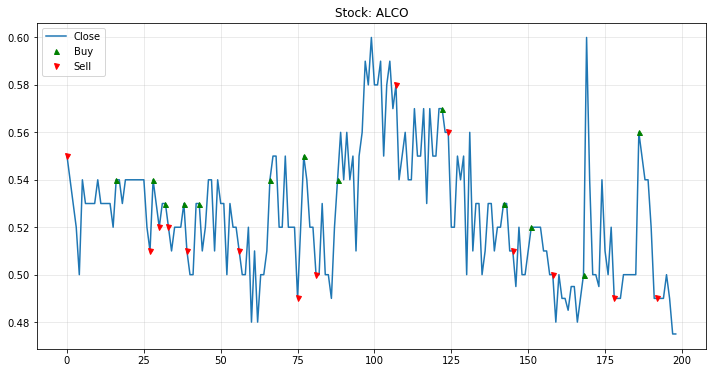

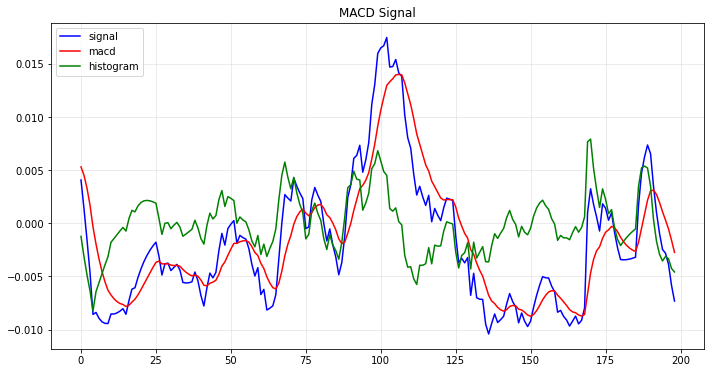

In [250]:
# PLOTTING THE DATA
sigb_df = pd.DataFrame({'B': s_buy})
sigs_df = pd.DataFrame({'S': s_sell})
test_df = pd.concat([hist, sigb_df], axis=1)
test_df = pd.concat([test_df1, sigs_df], axis=1)

b = test_df['B'].to_numpy()
s = test_df['S'].to_numpy()
close = hist['Price'].to_numpy()
m12 = hist['MACD_12_26_9'].to_numpy()
m26 = hist['MACDs_12_26_9'].to_numpy()
m = hist['MACDh_12_26_9'].to_numpy()

# PLOTTING THE STOCK MARKET PRICE AND ITS BUY AND SELL SIGNAL BASED ON MACD VALUES
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(close[-200:-1], label = 'Close')
plt.plot(b[-200:-1], '^', color = 'g', markersize = 5, label = 'Buy')
plt.plot(s[-200:-1], 'v',color = 'r', markersize = 5, label = 'Sell')
plt.legend(loc=2);
plt.title('Stock: ' + name)

plt.show()

# PLOTTING THE MACD INDICATORS
plt.rcParams['figure.figsize'] = 11.7, 6
plt.grid(True, alpha = .3)
plt.plot(m12[-200:-1], color = 'b', label = 'signal')
plt.plot(m26[-200:-1], color = 'r', label = 'macd')
plt.plot(m[-200:-1], color = 'g', label = 'histogram')
plt.legend(loc=2);
plt.title('MACD Signal')

plt.show()

The plot titled Stock:() shows a section of the price action of a company. The arrows indicates where the program chose to buy and sell the stock.

Below that plot is the the plot for the MACD indicator at the same section shown on the Stock plot.

### HOW THE MACD INDICATOR IS USED

The MACD indicator has three parts: MACD line, Signal line and the Histogram. The value of the Histogram is based on the difference of the values of the MACD line and the Signal line. Once the Signal line crosses the MACD line the value of the Histogram is zero.

Directions for buying:
    1. If histogram is below zero and is moving up approaching zero.
    2. Once histogram reaches zero from below, this is a buy signal.

Directions for selling:
    1. If histogram is above zero and is moving down approaching zero.
    2. Once histogram reaches zero from above, this is a sell signal.

### MAIN PROGRAM 

In [193]:
# VARIABLES TO BE USED AFTER ALL COMPANIES ARE ANALYZED
tot_growth = []
dt_buy = []
dt_sell = []

# LOOPS THROUGH ALL THE COMPANIES INSIDE THE TICKERS VARIABLE
for name in tickers:
    hist = data[[name]].set_axis(['Price'], axis=1)
    hist = hist[::-1].reset_index(drop = True) 
    hist = hist[(hist != 0).all(1)]
    hist.ta.macd(close='Price', fast=12, slow=26, append = True)
    hist.dropna(inplace=True)
    
    # CREATES A LIST OF MACD AND PRICE
    histo = list(hist['MACDh_12_26_9'])
    price = list(hist['Price'])

    # VARIABLES (RESETS FOR EACH COMPANY)
    d_buy = 0
    d_sell = 0
    is_neg = 0
    growth = []

    # CHECKS THE FIRST VALUE OF HISTOGRAM (IF NEGATIVE OR POSITIVE)  
    if histo[0] < 0:
        is_neg = 1

    # GET BUY AND SELL VALUES      
    for x in range(len(histo)):
        if is_neg == 1:
            if histo[x] > 0:
                d_buy = price[x]
                is_neg = 0
        else:
            if histo[x] < 0:
                d_sell = price[x]
                is_neg = 1
                growth.append(((d_buy / d_sell)-1)*100)
    tot_growth.extend(growth)

<function matplotlib.pyplot.show(close=None, block=None)>

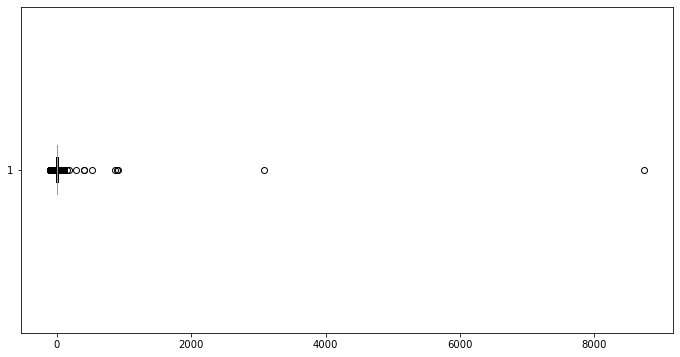

In [194]:
# VISUALIZING OUTLIERS
plt.boxplot(tot_growth, vert = False)
plt.show

In [195]:
# REMOVAL OF OUTLIERS
q75,q25 = np.percentile(tot_growth,[75,25])
intr_qr = q75-q25

max_num = q75+(1.5*intr_qr)
min_num = q25-(1.5*intr_qr)

final_list = [x for x in tot_growth if x < max_num and x > min_num]

<function matplotlib.pyplot.show(close=None, block=None)>

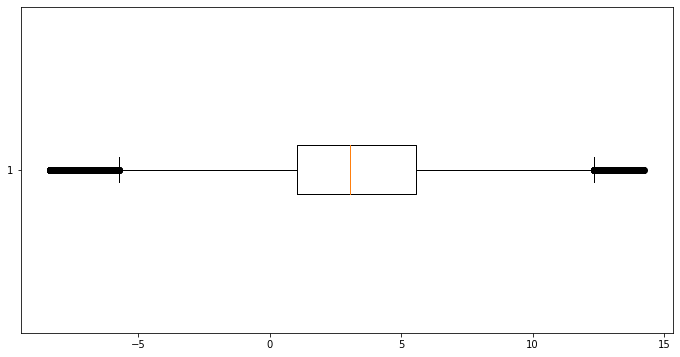

In [196]:
# VISUALIZATION AFTER REMOVING OUTLIERS
plt.boxplot(final_list, vert = False)
plt.show

### VISUALIZING THE RETURNS

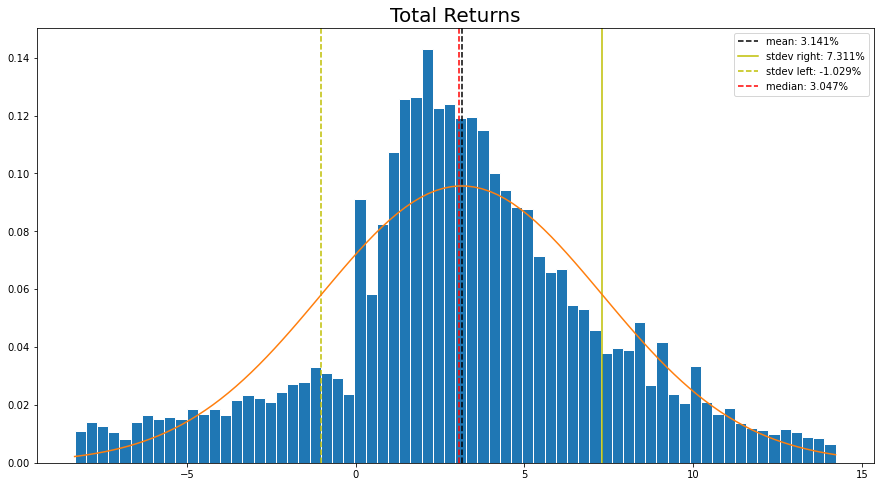

In [197]:
# VISUALIZATION USING HISTOGRAM
plt.rcParams['figure.figsize'] = 15, 8
plt.hist(final_list, bins='auto', edgecolor='w', density= True)
sd = stat.stdev(final_list)
m = stat.mean(final_list)
plt.axvline(m, color = 'k', linestyle = 'dashed', label = 'mean: ' + str(round(m, 3)) + '%')
plt.axvline(m + sd, color = 'y', linestyle = 'solid', label = 'stdev right: ' + str(round(m + sd, 3)) + '%')
plt.axvline(m - sd, color = 'y', linestyle = 'dashed', label = 'stdev left: ' + str(round(m - sd, 3)) + '%')
plt.axvline(np.median(final_list), color = 'r', linestyle = 'dashed', label = 'median: ' + str(round(np.median(final_list), 3)) + '%')

# OVERLAY DISTRIBUTION CURVE
data = np.linspace(min(final_list), max(final_list), 100)
plt.plot(data, norm.pdf(data, m, sd));

plt.title("Total Returns", fontsize = 20)
plt.legend()
plt.show()


### The results above shows that after analyzing a portion of the companies in the PSE market. The average returns a trader could get is 3.141% with a median return of 3.047%. As the data is skewed to the right, using the median value might be more appropriate.

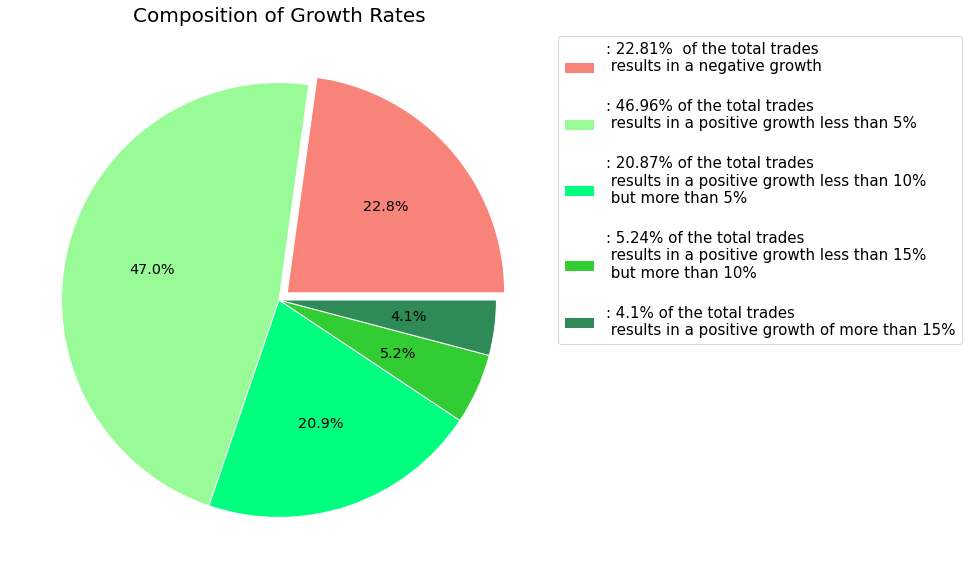

Total frequency of trades: 22956

Total frequency of positive trades: 17719

Total frequency of negative trades: 5237



In [198]:
# DATA FOR PIE CHART
tot_count = len(tot_growth)
neg_count = len(list(filter(lambda x: (x < 0), tot_growth)))
pos_count = len(list(filter(lambda x: (x >= 0), tot_growth)))
pos_5 = len(list(filter(lambda x: (x >= 5), tot_growth)))
pos_10 = len(list(filter(lambda x: (x >= 10), tot_growth)))
pos_15 = len(list(filter(lambda x: (x >= 15), tot_growth)))

plt.subplots(figsize=(10, 10))
name = np.array([neg_count, pos_count - pos_5, pos_5 - pos_10, pos_10 - pos_15, pos_15])
mylabels = [': ' + str(round(neg_count / tot_count * 100, 2)) + '%  of the total trades \n results in a negative growth \n', 
            ': ' + str(round((pos_count - pos_5) / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth less than 5% \n', 
            ': ' + str(round((pos_5 - pos_10) / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth less than 10% \n but more than 5% \n', 
            ': ' + str(round((pos_10 - pos_15) / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth less than 15%  \n but more than 10% \n',
            ': ' + str(round(pos_15 / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth of more than 15%']
mycolor = ['#F88379', '#98fb98', '#00ff7f', '#32cd32', '#2e8b57']
myexplode = [0.05, 0, 0, 0, 0]
plt.pie(name, labels = mylabels, explode = myexplode, colors = mycolor, autopct='%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, labeldistance=None)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize = 15)
plt.title('Composition of Growth Rates', fontsize = 20)
plt.show()

print('Total frequency of trades: ' + str(tot_count) +'\n')
print('Total frequency of positive trades: ' + str(pos_count) +'\n')
print('Total frequency of negative trades: ' + str(neg_count) +'\n')

### The Pie Chart above shows the composition of growth rate calculated from all the companies analyzed. The data shows that at least 77.2% of the trades done are profitable while 22.8% will be losses.

### In conclusion, using the MACD indicator as a trading strategy in the PSE market could provide some profitable trades. Trading in the long run would provide a net positive in returns around 3.00%. Considering that fees amount to an estimated total of 1.19%, the average growth for every trade would be around 1.81%.

# POTENTIAL RETURNS PER INDUSTRY

## CREATED A FUNCTION OF THE PROGRAM
#### PRETTY MUCH THE SAME PROGRAM ABOVE

In [283]:
def analysis(sector):
    data = pd.read_csv(r'*my dir*\MACD STUDY\STOCK DATA\PSEi ALL.csv') 
    f = open(r'*my dir*\MACD STUDY\STOCK DATA\\' + sector + '.txt')
    tickers = f.read().split()
    f.close()
    tot_growth = []
    dt_buy = []
    dt_sell = []
    for name in tickers:
        hist = data[[name]].set_axis(['Price'], axis=1)
        hist = hist[::-1].reset_index(drop = True) 
        hist = hist[(hist != 0).all(1)]
        hist.ta.macd(close='Price', fast=12, slow=26, append = True)
        hist.dropna(inplace=True)
        histo = list(hist['MACDh_12_26_9'])
        price = list(hist['Price'])
        d_buy = 0
        d_sell = 0
        is_neg = 0
        growth = []
        if histo[0] < 0:
            is_neg = 1  
        for x in range(len(histo)):
            if is_neg == 1:
                if histo[x] > 0:
                    d_buy = price[x]
                    is_neg = 0
            else:
                if histo[x] < 0:
                    d_sell = price[x]
                    is_neg = 1
                    growth.append(((d_buy / d_sell)-1)*100)
        tot_growth.extend(growth)
    q75,q25 = np.percentile(tot_growth,[75,25])
    intr_qr = q75-q25
    max_num = q75+(1.5*intr_qr)
    min_num = q25-(1.5*intr_qr)
    final_list = [x for x in tot_growth if x < max_num and x > min_num]
    plt.rcParams['figure.figsize'] = 15, 8
    plt.hist(final_list, bins='auto', edgecolor='w', density= True)
    sd = stat.stdev(final_list)
    m = stat.mean(final_list)
    plt.axvline(m, color = 'k', linestyle = 'dashed', label = 'mean: ' + str(round(m, 3)) + '%')
    plt.axvline(m + sd, color = 'y', linestyle = 'solid', label = 'stdev right: ' + str(round(m + sd, 3)) + '%')
    plt.axvline(m - sd, color = 'y', linestyle = 'dashed', label = 'stdev left: ' + str(round(m - sd, 3)) + '%')
    plt.axvline(np.median(final_list), color = 'r', linestyle = 'dashed', label = 'median: ' + str(round(np.median(final_list), 3)) + '%')
    data = np.linspace(min(final_list), max(final_list), 100)
    plt.plot(data, norm.pdf(data, m, sd));
    plt.title(sector, fontsize = 20)
    plt.legend()
    plt.show()
    tot_count = len(tot_growth)
    neg_count = len(list(filter(lambda x: (x < 0), tot_growth)))
    pos_count = len(list(filter(lambda x: (x >= 0), tot_growth)))
    pos_5 = len(list(filter(lambda x: (x >= 5), tot_growth)))
    pos_10 = len(list(filter(lambda x: (x >= 10), tot_growth)))
    pos_15 = len(list(filter(lambda x: (x >= 15), tot_growth)))
    plt.subplots(figsize=(10, 10))
    name = np.array([neg_count, pos_count - pos_5, pos_5 - pos_10, pos_10 - pos_15, pos_15])
    mylabels = [': ' + str(round(neg_count / tot_count * 100, 2)) + '%  of the total trades \n results in a negative growth \n', 
                ': ' + str(round((pos_count - pos_5) / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth less than 5% \n', 
                ': ' + str(round((pos_5 - pos_10) / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth less than 10% \n but more than 5% \n', 
                ': ' + str(round((pos_10 - pos_15) / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth less than 15%  \n but more than 10% \n',
                ': ' + str(round(pos_15 / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth of more than 15%']
    mycolor = ['#F88379', '#98fb98', '#00ff7f', '#32cd32', '#2e8b57']
    myexplode = [0.05, 0, 0, 0, 0]
    plt.pie(name, labels = mylabels, explode = myexplode, colors = mycolor, autopct='%.1f%%',
           wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
           textprops={'size': 'x-large'}, labeldistance=None)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize = 15)
    plt.title('Composition of Growth Rates', fontsize = 20)
    plt.show()

    print('Total frequency of trades: ' + str(tot_count) +'\n')
    print('Total frequency of positive trades: ' + str(pos_count) +'\n')
    print('Total frequency of negative trades: ' + str(neg_count) +'\n')

### SECTORS IN THE PSE INCLUDES: 'FINANCIALS', 'HOLDINGS', 'INDUSTRIALS', 'MINING_OIL', 'PROPERTY', 'SERVICE', & 'SME'

#### BELOW SHOWS ALL THE POTENTIAL RETURNS FOR EACH INDUSTRY

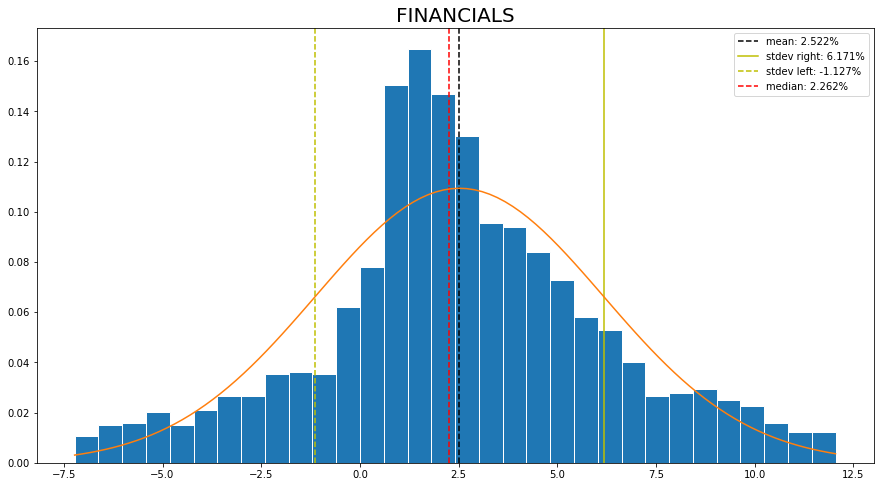

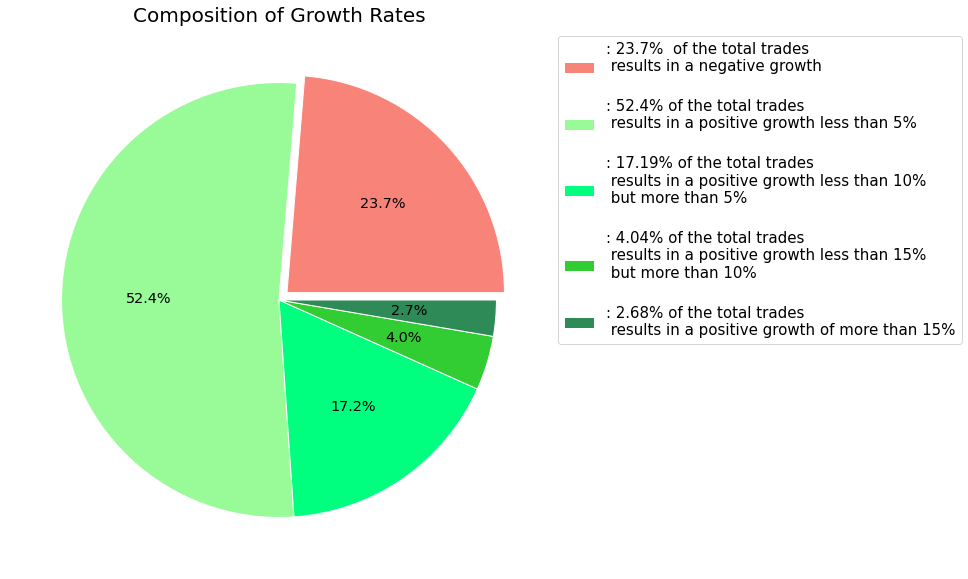

Total frequency of trades: 2502

Total frequency of positive trades: 1909

Total frequency of negative trades: 593



In [295]:
analysis('FINANCIALS')

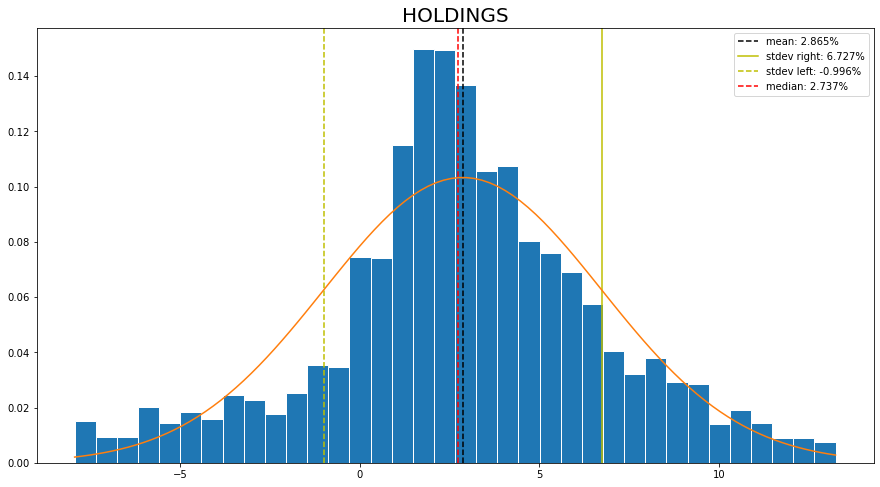

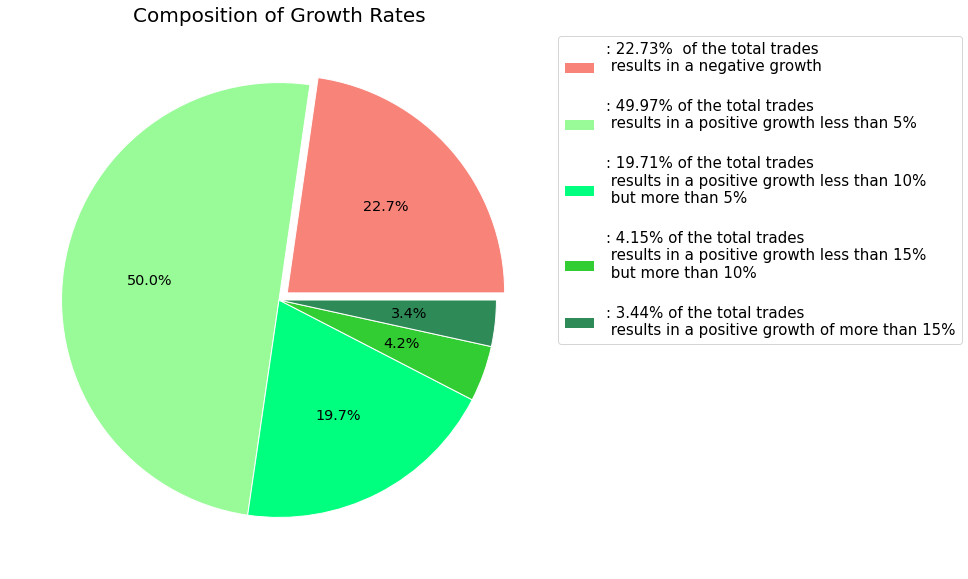

Total frequency of trades: 3084

Total frequency of positive trades: 2383

Total frequency of negative trades: 701



In [288]:
analysis('HOLDINGS')

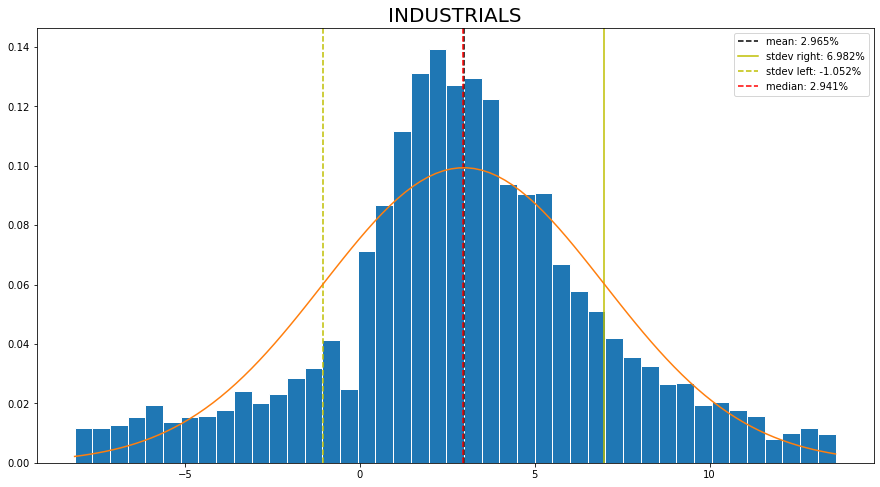

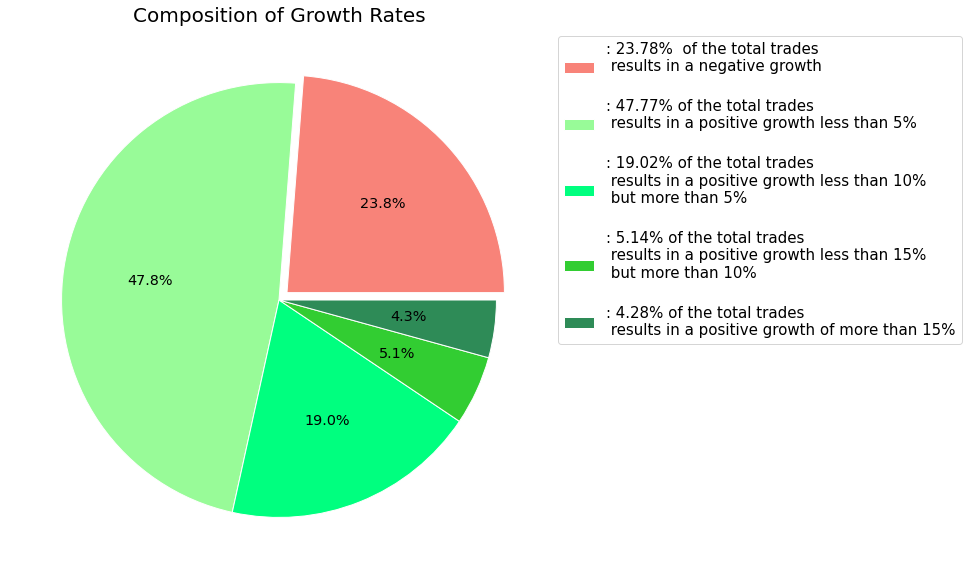

Total frequency of trades: 5677

Total frequency of positive trades: 4327

Total frequency of negative trades: 1350



In [289]:
analysis('INDUSTRIALS')

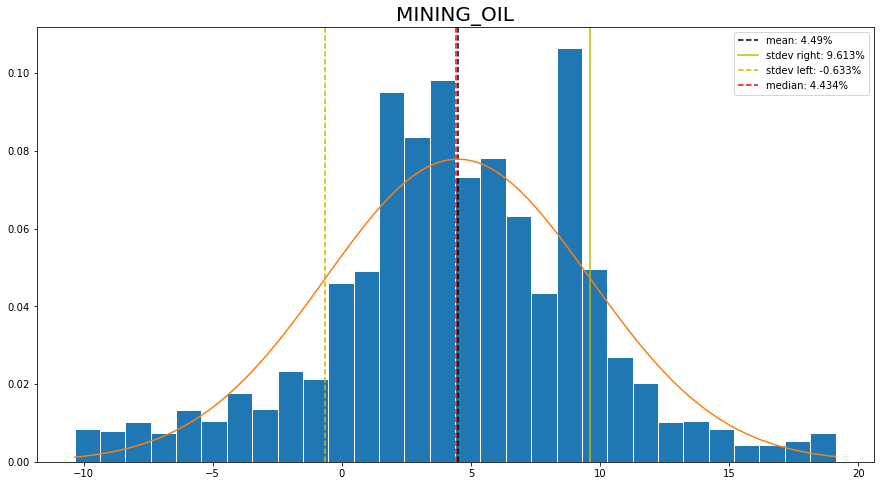

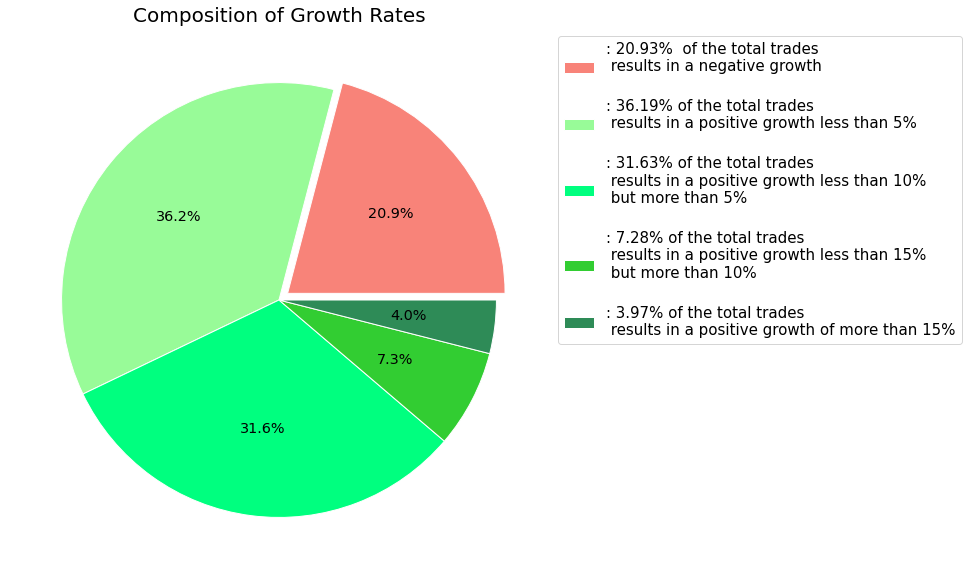

Total frequency of trades: 2570

Total frequency of positive trades: 2032

Total frequency of negative trades: 538



In [291]:
analysis('MINING_OIL')

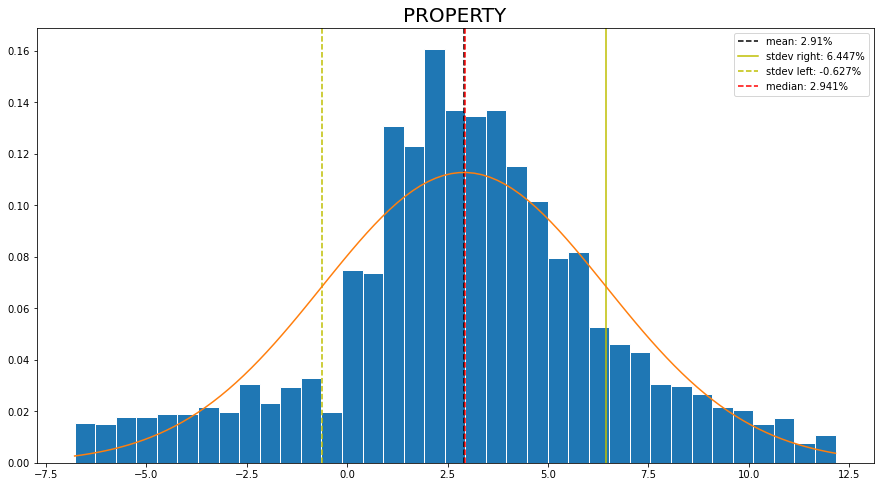

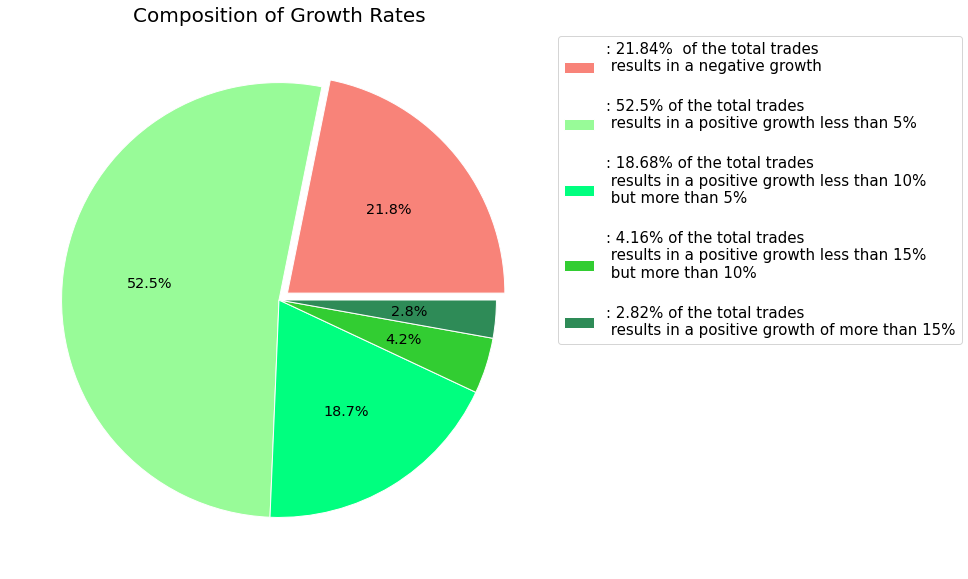

Total frequency of trades: 3796

Total frequency of positive trades: 2967

Total frequency of negative trades: 829



In [292]:
analysis('PROPERTY')

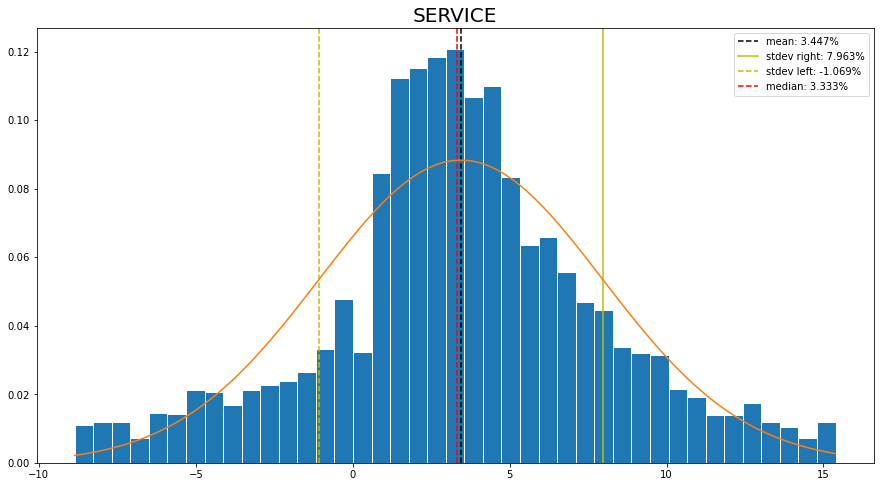

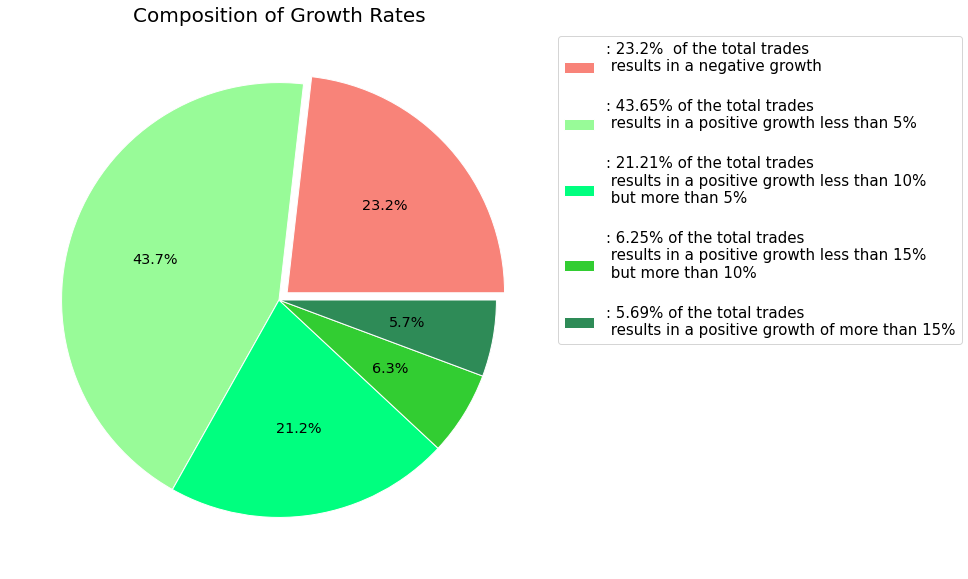

Total frequency of trades: 5134

Total frequency of positive trades: 3943

Total frequency of negative trades: 1191



In [293]:
analysis('SERVICE')

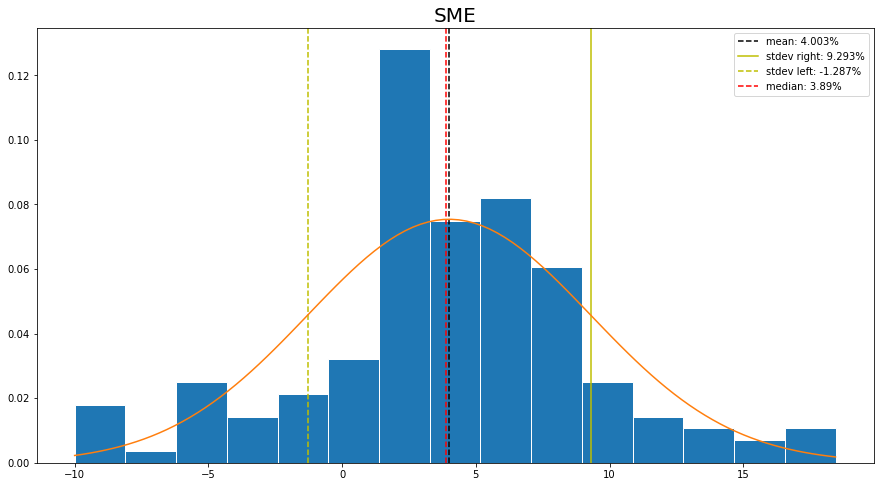

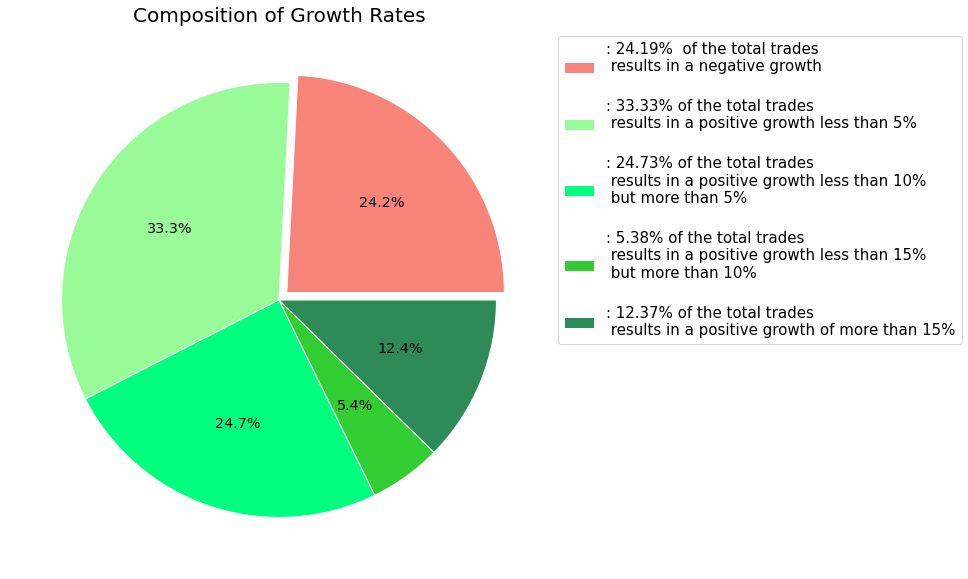

Total frequency of trades: 186

Total frequency of positive trades: 141

Total frequency of negative trades: 45



In [294]:
analysis('SME')

### Above graphs shows that using the MACD strategy for the Mining and Oil Sector gives the most profitable returns with probability of 79.07% of making a profit with a median return of 4.434%.

#### THE END (CREATED BY: JEB TRABADO - 2023)